# SNR Calculation
Ok we want to run a calculation to calculate how long it will take to get a certain SNR while observing a supernova. What we would like to be able to do is the following -
1. Pick source (Supernova) and backgound (Galaxy, sky background properties).
2. Run the observation and get SNR for a given exposure time.


In [1]:
from astropy import units as u


import config_stp_wcc
import config_um

data_stp = config_um.load_config_values()
data_path_stp = config_um.get_data_path()
data_path_stp = data_path_stp if data_path_stp.endswith('/') else data_path_stp + '/'

data_path_wcc = config_stp_wcc.get_data_path()
data_wcc = config_stp_wcc.load_config_values()


Right now, all of these calls are merged into one -

Adding Sensor
Adding Mirrors
Adding Filters
Number of PSF pixels: 36.0 pix


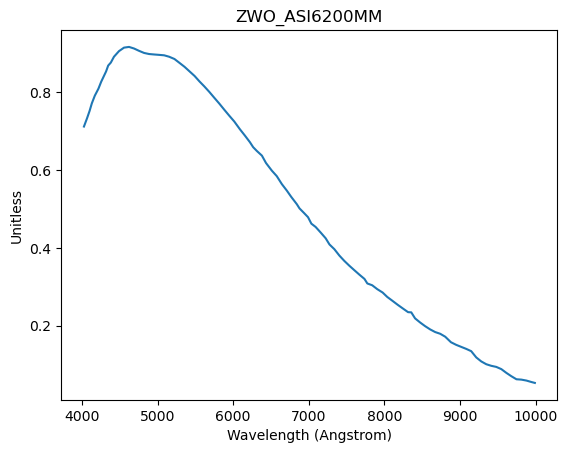

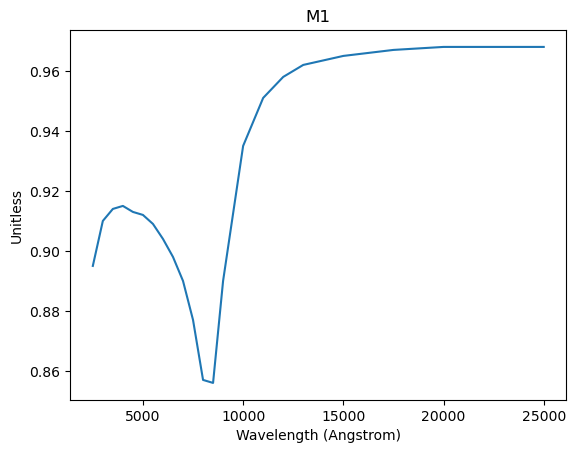

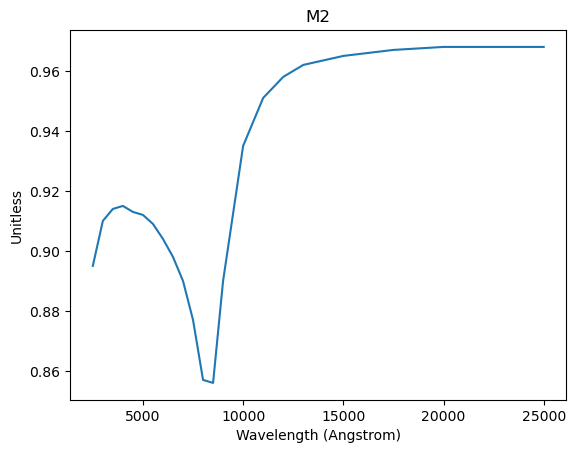

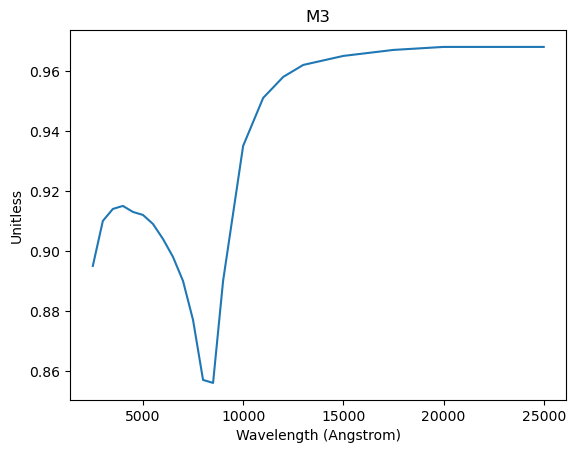

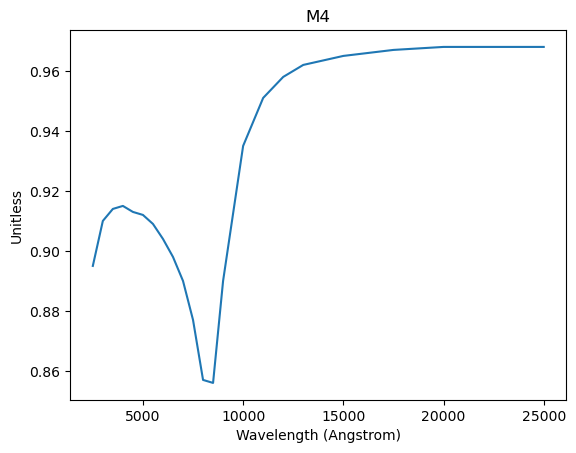

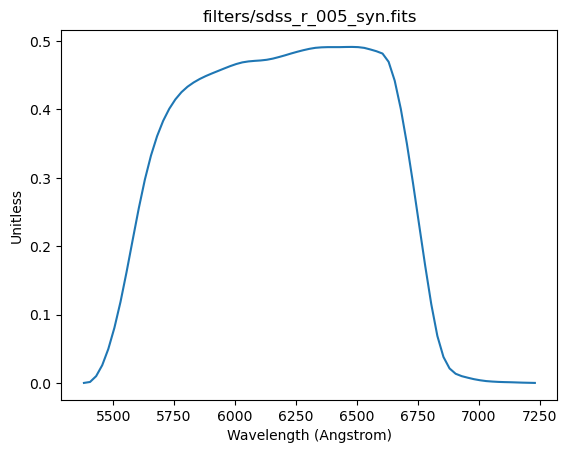

In [2]:
from etc_wcc import ExposureTimeSNRCalculator as etsc
obs = etsc.Observatory(telescope_name="UM")
obs.make_STP(plot=True)

At this point, our observatory configuration is set up. Now we set up the science configuration -

You need the `UASAL_ARCHIVE` environment variable configured on your machine to use this functionality. This is where the host galaxy spectra are hosted. Secondly, the galaxy spectrum REPLACES the zodi background. The case where these are comparable is not addressed here. 

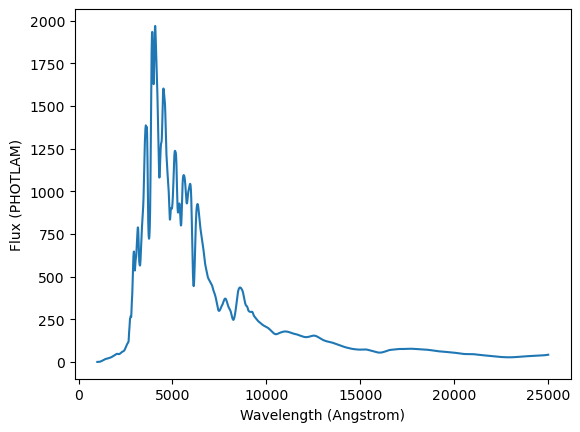

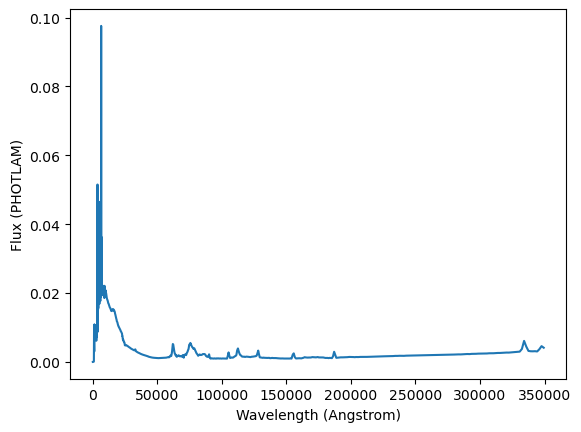

In [3]:
#   Get environment variables
import os
uasal_archive = os.environ.get("UASAL_ARCHIVE")

obs.create_supernova_spectrum(epoch=1, source_z=0.0,support_data_path=data_path_stp, plot=True)
obs.set_background(background_file='ngc_2537_spec.fits',support_data_path=f'{uasal_archive}/astr_obj_models/galaxies/brown/', plot=True)

Now we can make the observation. There is already currently a call for this -

Now make observation, keeping in mind that the `flux` for the supernova is in magnitudes, but the `bg_flux` is in Surface Brightness units (magnitudes/arcsec**2) in the Johnson V band

(<Quantity 16230.7003758 electron / s>, <Quantity 1219.28523787 electron / s>)

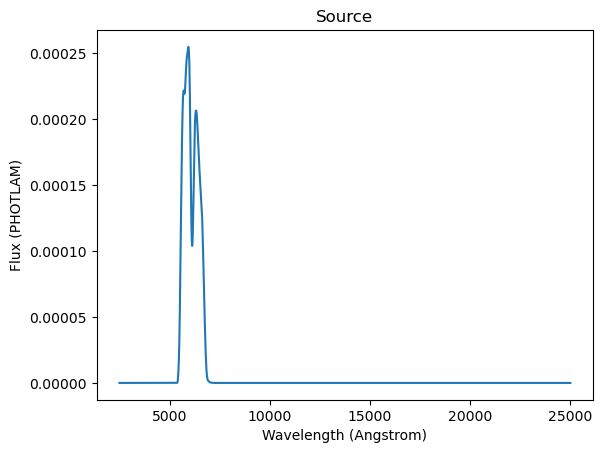

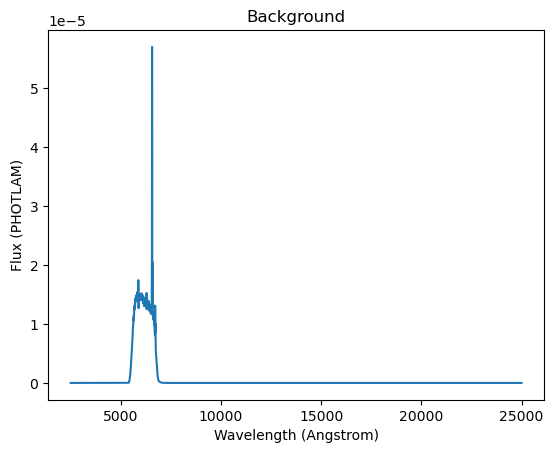

In [4]:
obs.make_observation(flux=15, bg_flux=18, plot=True)

Now the SNR calculation currently in place assumes our source is embedded in the larger background of the host galaxy. The aperture is taken into account when converting Surface Brightness into the integrated magnitude of the source. 

In [5]:
# Calculate the CCD's Saturation Time
obs.calc_saturation_time()

<Quantity 33.57581333 s>

In [6]:
# Calculate the Signal-to-noise for a given time in seconds
obs.calc_SNR(exp_time=1.0*u.s, int_time=1.0*u.s)   

np.float64(122.57161083817483)

In [7]:
# Calculate the time it takes, in seconds, to reach the given SNR
obs.calc_int_time( 140, exp_time= 1.0*u.s)            

<Quantity 1.30459673 ct s / electron>

In [8]:
# Calculate the required source flux to achieve the given SNR at the given time
obs.calc_req_source(snr=10, int_time=1*u.s, exp_time=1*u.s, magnitude=False)    

np.float64(154.7696323491612)

In [9]:
# Same, but give required source magnitude
obs.calc_req_source(snr=10, int_time=1*u.s, exp_time=1*u.s, magnitude=True)     

(20.051628774153517,
 ['/home/ssabhlok/anaconda3/envs/lina/lib/python3.12/site-packages/config_stp_wcc/support_data/filters/sdss_r_005_syn.fits x 1'])